# Пример работы с прогнозным сервисом

Для примера возьмем данные "Индикатор бизнес-климата ЦБ (промышленность), пункты, Россия"

In [93]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import requests
import json

In [109]:
df = pd.read_csv(f'./raw_data/Новостной идекс ЦБ, Россия — Диаграмма.csv', sep=';')
df.columns = ['dataset', 'date', 'values']
df.head(3)

,dataset,date,values
0,62293,01.02.2004,1.283101
1,62293,01.03.2004,1.316614
2,62293,01.04.2004,1.544784


возьмем все значения кроме последних трех

In [110]:
horizon = 3

df_train = df.iloc[:-horizon]

x = list(df_train['date'])
y = list(df_train['values'])

df_train['date'] = pd.to_datetime(df_train['date'], format='%d.%m.%Y').dt.date
df['date'] = pd.to_datetime(df['date'], format='%d.%m.%Y').dt.date

/tmp/ipykernel_5440/2062906803.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['date'] = pd.to_datetime(df_train['date'], format='%d.%m.%Y').dt.date


построим график

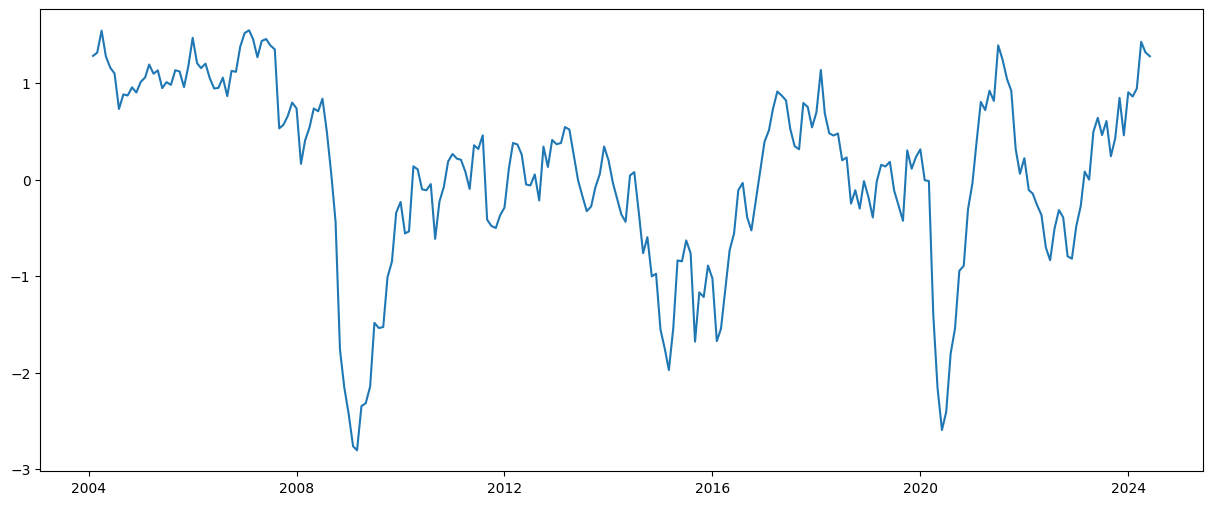

In [111]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(df.date, df['values'])


# Формирование запроса

In [127]:
url = 'http://localhost:5051/forecast/api/v1/base'

data = {
    "hparams": {
        "lookback": 100,
        "horizon": 6,
        "epochs": 10,
        "learning_rate": 0.001
    },
    "target": {
        "values": y,
        "dates": x
    }
}

# Отправка запроса

In [128]:
response = requests.get(url, json=data)
response.status_code

200

Получаем список значений

In [129]:
forecast = response.json()

# прогноз модели на предыдущие значения
train_pred = forecast['previous']

# прогноз модели
pred_y = forecast['predict']

In [130]:
train_pred

[1.544783592224121,
 1.2786227464675903,
 1.1600935459136963,
 1.1010805368423462,
 0.7327805757522583,
 0.8840969204902649,
 0.8728043437004089,
 0.9570358991622925,
 0.9040769338607788,
 1.0141267776489258,
 1.0599262714385986,
 1.1939566135406494,
 1.0984236001968384,
 1.1331310272216797,
 0.9491828680038452,
 1.01083242893219,
 0.9828919172286987,
 1.1347429752349854,
 1.121468186378479,
 0.9598131775856018,
 1.1724439859390259,
 1.4699451923370361,
 1.207031011581421,
 1.156306505203247,
 1.203012228012085,
 1.052193522453308,
 0.944872260093689,
 0.9518474340438843,
 1.0578243732452393,
 0.8659986853599548,
 1.1280956268310547,
 1.1181154251098633,
 1.3777858018875122,
 1.519203543663025,
 1.5485299825668335,
 1.4586341381072998,
 1.269127368927002,
 1.4376730918884277,
 1.4577947854995728,
 1.3911492824554443,
 1.350832462310791,
 0.5322739481925964,
 0.5693504810333252,
 0.6638190150260925,
 0.7995994687080383,
 0.738568127155304,
 0.1640462726354599,
 0.40750810503959656,
 0.5

In [124]:
pred_y

[0.9111347794532776,
 0.8561565279960632,
 0.7952622175216675,
 0.7321575880050659,
 0.6787648797035217,
 0.6589164137840271]

Наносим на график

In [125]:
len(train_pred)

240

In [126]:
df_train.shape

(242, 3)

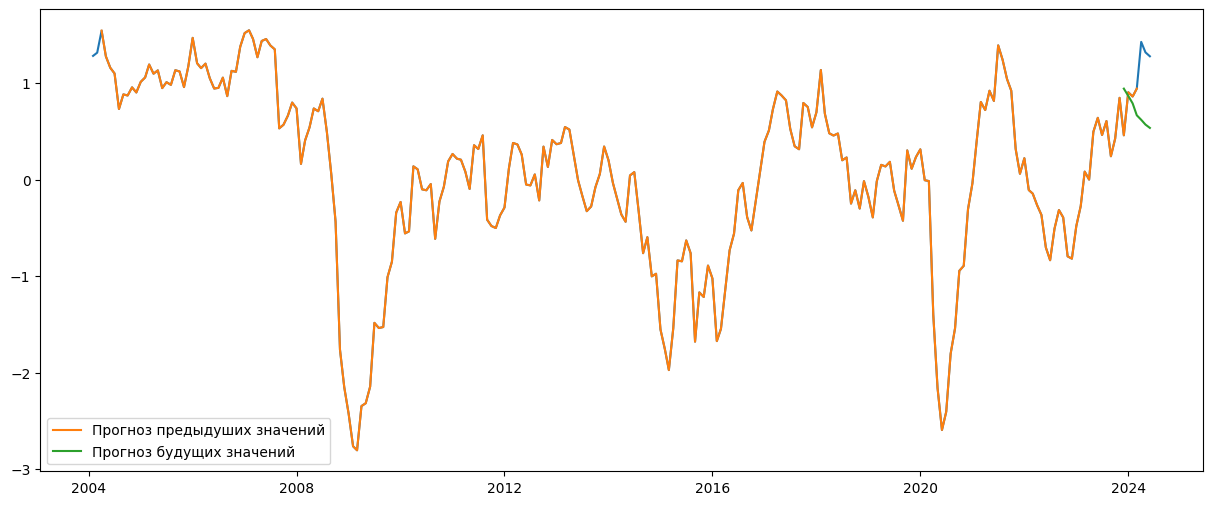

In [119]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(df.date, df['values'])
ax.plot(df_train.date[2:], train_pred, label='Прогноз предыдуших значений')
ax.plot(df.date[-7:], [train_pred[-1]] + pred_y, label='Прогноз будущих значений')

ax.legend()